![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Tokenización de textos  

En este taller podrán poner en práctica sus conocimientos sobre preprocesamiento de texto (tokenización). El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos detección de toxicidad en comentarios

En este taller se usará el conjunto de datos de detección de toxicidad en comentarios de la base de datos de Kaggle. Cada observación es un comentario que tiene como variable objetivo (target) la probabilidad de ser un comentario tóxico. El objetivo es predecir la toxicidad de cada comentario. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/c/jigsaw-unintended-bias-in-toxicity-classification/data).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación librerías
import pandas as pd
import numpy as np
import scipy as sp
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import datasets
from sklearn.linear_model import LinearRegression

import time


%matplotlib inline

In [3]:
# Carga de datos de archivos .csv
df = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/Toxicity.zip')
df = df[['id','comment_text', 'target']]
df.head()

,id,comment_text,target
0,6101457,What are you talking about? What group do Pete...,0.0
1,5342103,"NO!, Let him, we need a Conservative government.",0.0
2,743361,"Perhaps he took the ""power out of the Cardinal...",0.2
3,551008,"As always, yours is dripping with sarcasm, whi...",0.0
4,865998,The dirty little secret is that the price rang...,0.3


<AxesSubplot:>

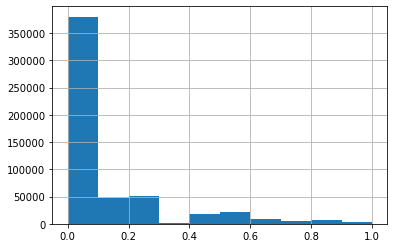

In [4]:
# Impresión histograma de variable de interés (y)
df.target.hist()

In [5]:
df.comment_text.str.len().describe()

count    541462.000000
mean        297.391015
std         269.486412
min           1.000000
25%          94.000000
50%         202.000000
75%         414.000000
max        1737.000000
Name: comment_text, dtype: float64

<AxesSubplot:>

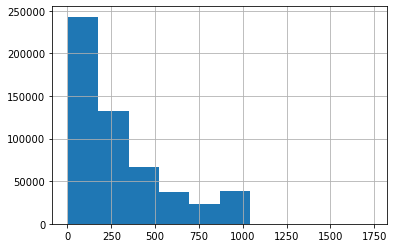

In [6]:
df.comment_text.str.len().hist()

In [7]:
df2=df[df.comment_text.str.len()>94]

In [8]:
df2.comment_text.str.len().describe()

count    405335.000000
mean        379.181151
std         264.968197
min          95.000000
25%         169.000000
50%         287.000000
75%         514.000000
max        1737.000000
Name: comment_text, dtype: float64

In [9]:
# Separación de variable de interés (y)
y = df2.target
y.describe()

count    405335.000000
mean          0.107404
std           0.195653
min           0.000000
25%           0.000000
50%           0.000000
75%           0.166667
max           1.000000
Name: target, dtype: float64

In [10]:
# Separación de variables predictoras (X), solo se considera el texto de la noticia
X = df2.comment_text

In [11]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Punto 1 - Tokenización con CountVectorizer

En la celda 1 creen y entrenen el modelo de regresión de su preferencia, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [12]:
mse=[]

In [13]:
# Celda 1
cv = CountVectorizer(dtype=np.int8,strip_accents='ascii',stop_words='english',lowercase=True)

 ### Aprendizaje del vocabulario (diccionario) de todos los token de los comentarios en crudo

In [14]:
cv.fit(list(X_train)+list(X_test))

CountVectorizer(dtype=<class 'numpy.int8'>, stop_words='english',
                strip_accents='ascii')

### Transformacion de documentos a matriz de terminos

In [15]:
x_train_vec = cv.transform(X_train)
x_test_vec = cv.transform(X_test)

### Entrenamiento del regresor en train

In [16]:
start_time = time.time()
regressor = LinearRegression().fit(x_train_vec, y_train)
#regressor = xgb.XGBRegressor(verbosity=0)
regressor.fit(x_train_vec,y_train)
print("--- %s seconds ---" % (time.time() - start_time))

--- 2142.071655035019 seconds ---


### Predicción de las observaciones del set de test

In [17]:
start_time = time.time()
regressor.fit(x_test_vec, y_test)
print("--- %s seconds ---" % (time.time() - start_time))

--- 674.6981880664825 seconds ---


In [18]:
score = regressor.score(x_test_vec, y_test)  
print("Training score: ", score)

Training score:  0.7862582412048584


In [19]:
y_pred= regressor.predict(x_test_vec)

### Evaluación  del error promedio y r2 de las predicciones

In [20]:
mse.append(np.sqrt(mean_squared_error(y_pred, y_test)))
r2=r2_score(y_pred, y_test)

In [21]:
print("mse:",mse[0])
print("r2:",r2)

mse: 0.09044509034954185
r2: 0.728153237427253


## Punto 2 - Tokenización con CountVectorizer y trigramas

En la celda 2 creen y entrenen el mismo modelo de regresión del punto anterior (es decir si usaron un RandomForestRegresor usen nuevamente ese regresor), para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer **considerando trigramas** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [22]:
# Celda 2
cv = CountVectorizer(dtype=np.int8,strip_accents='ascii',stop_words='english',lowercase=True,ngram_range=(3, 3))

 ### Aprendizaje del vocabulario (diccionario) de todos los token de los comentarios en crudo

In [23]:
cv.fit(list(X_train)+list(X_test))

CountVectorizer(dtype=<class 'numpy.int8'>, ngram_range=(3, 3),
                stop_words='english', strip_accents='ascii')

### Transformacion de documentos a matriz de terminos

In [24]:
x_train_vec = cv.transform(X_train)
x_test_vec = cv.transform(X_test)

### Entrenamiento del regresor en train

In [25]:
start_time = time.time()
regressor = LinearRegression().fit(x_train_vec, y_train)
#regressor = xgb.XGBRegressor(verbosity=0)
regressor.fit(x_train_vec,y_train)
print("--- %s seconds ---" % (time.time() - start_time))

--- 1232.3724346160889 seconds ---


### Predicción de las observaciones del set de test

In [26]:
start_time = time.time()
regressor.fit(x_test_vec, y_test)
print("--- %s seconds ---" % (time.time() - start_time))

--- 320.2972877025604 seconds ---


In [27]:
score = regressor.score(x_test_vec, y_test)  
print("Training score: ", score)

Training score:  0.9995529650405394


In [28]:
y_pred= regressor.predict(x_test_vec)

### Evaluación  del error promedio y r2 de las predicciones

In [29]:
mse.append(np.sqrt(mean_squared_error(y_pred, y_test)))
r2=r2_score(y_pred, y_test)

In [30]:
print("mse:",mse[1])
print("r2:",r2)

mse: 0.004136290679425173
r2: 0.9995527651109521


## Punto 3 - TfidfVectorizer

Investigen sobre la función TfidfVectorizer. En la celda de texto 3, expliquen en qué consiste esta técnica de tokenización (describanla y expliquen su funcionamiento) y cúales son las ventajas o deventajas de su uso al compararlo con la función CountVectorizer.

In [31]:
#Celda 3

# TF-IDF (TfidfVectorizer)

## Que es TF-IDF

- Representación matemática de documentos
- Term Frecuency-Inverse Document Frecuency
- Tipo "bolsa de palabras" como CountVectorizer
- Medida estadística de cuan importante es una palabra para un documento en un corpus
- Usado ampliamente en recuperación de información de textos

## Utilidad del TF-IDF

- Ranking de enlaces de buscadores web
- Generación de resúmenes de texto
- Agrupación y clasificación de documentos
- Autenticación de autoría de un texto
- Recomendación de documentos

## Cálculo del TF

Un termino t<sub>j</sub> que aparece muchas veces en un documentos d<sub>i</sub> es mas importante que otro que aparece pocas.

![](img01.png)

- donde n<sub>ij</sub> es el numero de veces que aparece el termino t<sub>j</sub> en el documento d<sub>i</sub> 

- Ejemplo:

  ![](img02.png)

![](img03.png)





## Calculo del IDF

- Un termino t<sub>j</sub> que aparece en pocos documentos discrimina mejor que uno que aparece en muchos

  ![](img04.png)

  - donde N es el numero total de documentos y n<sub>j</sub> es el numero de documentos que contiene el termino t<sub>j</sub>

## Representación final del documento

- Cada documento j queda representado como un vector de características d<sub>j</sub>:

  ![](img05.png)

- Se seleccionan los n términos con los valores mas altos en todos los documentos

- Ejemplo:

  ![image-20220428172528088](img06.png)

  ![image-20220428172647671](img07.png)

## Características del TF-IDF

- Los vectores de características TF-IDF de documentos similares están próximos entre sí
- Existen otras variantes de TF-IDF
- No se considera el orden de las palabras
- No es una representación autocontenido
- No hay garantías sobre el cubrimiento de los n términos elegidos sobre el total de documentos
- Suele generar agrupaciones pequeñas

## Punto 4 - Tokenización con TfidfVectorizer

En la celda 4 creen y entrenen el mismo modelo de regresión del primer punto, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Procesen los comentarios con la función **TfidfVectorizer** y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [32]:
# Celda 4
cv = TfidfVectorizer(dtype=np.int8,strip_accents='ascii',stop_words='english',lowercase=True)

 ### Aprendizaje del vocabulario (diccionario) de todos los token de los comentarios en crudo

In [33]:
cv.fit(list(X_train)+list(X_test))

TfidfVectorizer(dtype=<class 'numpy.int8'>, stop_words='english',
                strip_accents='ascii')

### Transformacion de documentos a matriz de terminos

In [34]:
x_train_vec = cv.transform(X_train)
x_test_vec = cv.transform(X_test)

### Entrenamiento del regresor en train

In [35]:
start_time = time.time()
regressor = LinearRegression().fit(x_train_vec, y_train)
#regressor = xgb.XGBRegressor(verbosity=0)
regressor.fit(x_train_vec,y_train)
print("--- %s seconds ---" % (time.time() - start_time))

--- 833.5881843566895 seconds ---


### Predicción de las observaciones del set de test

In [36]:
start_time = time.time()
regressor.fit(x_test_vec, y_test)
print("--- %s seconds ---" % (time.time() - start_time))

--- 241.50606489181519 seconds ---


In [37]:
score = regressor.score(x_test_vec, y_test)  
print("Training score: ", score)

Training score:  0.81723559221201


In [38]:
y_pred= regressor.predict(x_test_vec)

### Evaluación  del error promedio y r2 de las predicciones

In [39]:
mse.append(np.sqrt(mean_squared_error(y_pred, y_test)))
r2=r2_score(y_pred, y_test)

In [40]:
print("mse:",mse[2])
print("r2:",r2)

mse: 0.08363462603720472
r2: 0.7763626453267177


## Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos y comenten cómo el preprocesamiento de texto afecta el desempeño.

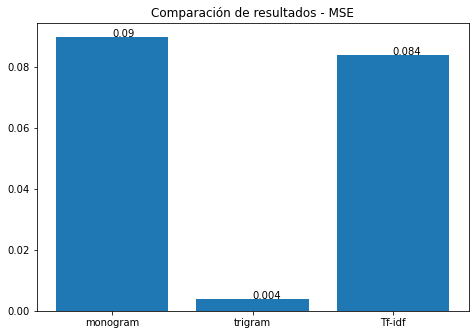

In [41]:
# Celda 5
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de resultados - MSE")
ejeX = ['monogram','trigram','Tf-idf']
np_array = np. around(np. array(mse),3)
ejeY = np_array
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()

* La prediccion hechas a partir de un solo token, monograma y frecuencia inversa presentan un comportamiento muy similar, esto es que finalmente ambas realiza la prediccion basada en la presencia de token en las noticias, sin embargo la vectorizacion no implica ningun orden en los token sino que la identificacion que el este presente con su frecuencia.
* Por otro lado, el analisis basado en trigramas, busca patrones mas similares entre texto, de ahi su mejora considerable en el desempeño.
* finalmente mas significativo hacer analisis de cadenas semanticas para identificar el proposito de un texto (analisis de sentimientos) que hacer esto mismo token a token